# 5. Monthly Anomalies
## Objective: Detect unusual trends in specific months due to climate events (e.g., El Niño).
### Method:
Calculate monthly anomalies by comparing current levels with long-term averages.
Highlight significant deviations in key months (e.g., monsoon season).
### Insights:
Detect how El Niño years deviate from non-El Niño years in terms of groundwater recharge.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "chennai-ground-water-levels-2023.csv"  # Replace with your file path
df = pd.read_csv(file_path)
df

,S.No.,Area No.,Dept No.,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.0,I,1.0,Kathivakkam,1.48,1.520000,1.462000,1.500000,1.530000,1.554000,1.688000,1.599,1.610000,1.53,1.29,1.38
1,2.0,I,2.0,Kathivakkam,3.26,3.293000,3.310000,3.360000,3.360000,3.382000,3.416000,3.459,3.470000,3.48,3.35,3.268
2,3.0,I,3.0,Ernavoor,2.01,2.236000,2.244000,2.240000,2.140000,2.166000,2.231000,2.51,2.264000,2.24,1.82,1.91
3,4.0,I,4.0,Sadaiyankuppam,3.67,3.745000,3.661000,3.660000,3.650000,3.638000,3.808000,4.01,3.646000,3.67,3.27,3.125
4,5.0,I,5.0,Kamadhenu Nagar,3.45,3.492000,3.439000,3.310000,3.410000,3.151000,3.499000,3.28,3.393000,3.2,3.07,3.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,200.0,XV,200.0,Semmenchery,3.17,3.380000,3.722000,4.050000,5.180000,4.907000,5.827000,5.078,2.960000,5.052,2.55,1.66
228,NaN,XV,NaN,Sub Total,30.33,34.454000,35.048000,38.540000,41.630000,35.609000,38.016000,34.559,31.402000,32.214,23.55,16.78
229,NaN,XV,NaN,Average,3.37,3.828222,3.894222,4.282222,4.625556,3.956556,4.224000,3.839888889,3.489111,3.579333333,2.616666667,2.397142857
230,NaN,NaN,NaN,Total,61.8067132,67.120093,68.835902,76.545540,81.858825,76.934578,83.898124,74.45,67.607943,70.58313813,46.50346831,43.70953687


In [3]:
# Columns for monthly groundwater levels
months = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_filtered = df[["Location"] + months]

In [4]:
# Convert monthly values to numeric (handling errors if any)
df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')

C:\Users\rumma\AppData\Local\Temp\ipykernel_16172\1142407886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')


In [5]:
# Calculate long-term monthly averages across all locations (baseline)
monthly_avg = df_filtered[months].mean()

In [6]:
# Calculate monthly anomalies (difference from long-term average)
df_anomalies = df_filtered.copy()
for month in months:
    df_anomalies[month] = df_filtered[month] - monthly_avg[month]  # Difference from baseline


In [7]:
# Identify and highlight significant deviations (e.g., > ±0.5m anomaly)
threshold = 0.5  # Adjust based on sensitivity
df_anomalies_high = df_anomalies[(df_anomalies[months] > threshold).any(axis=1)]
df_anomalies_low = df_anomalies[(df_anomalies[months] < -threshold).any(axis=1)]


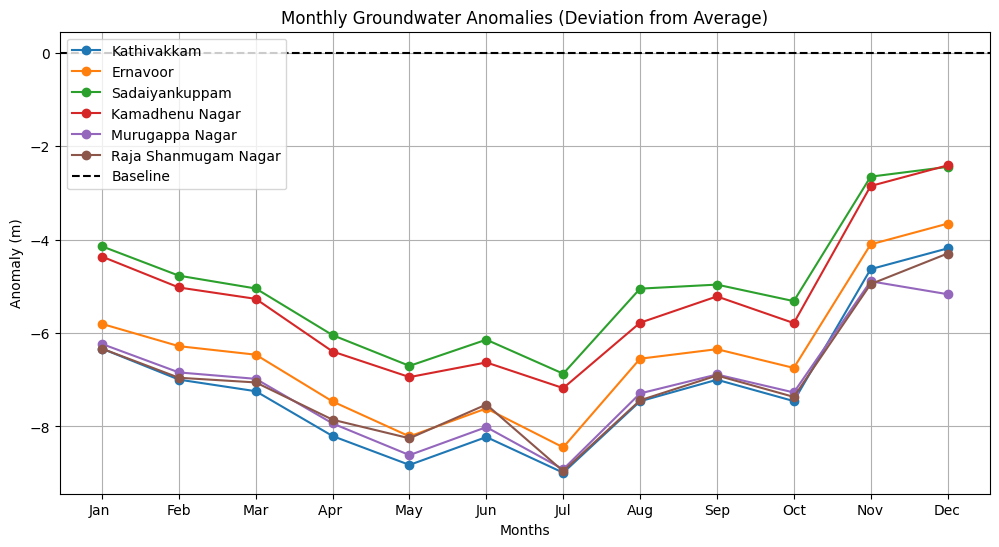

In [10]:
# Plot anomalies for selected wards
plt.figure(figsize=(12, 6))
for location in df_anomalies["Location"].unique()[:6]:  # First 6 locations for visualization
    subset = df_anomalies[df_anomalies["Location"] == location]
    plt.plot(months, subset.iloc[0, 1:13].values, marker='o', linestyle='-', label=location)

plt.axhline(0, color='black', linestyle='--', label="Baseline")  # Show reference line
plt.xlabel("Months")
plt.ylabel("Anomaly (m)")
plt.title("Monthly Groundwater Anomalies (Deviation from Average)")
plt.legend()
plt.grid()
plt.show()

In [11]:
# Print wards with significant anomalies
print("\n📌 Locations with High Positive Anomalies (Unusual Increase in Groundwater Levels):")
print(df_anomalies_high[["Location"] + months])

print("\n📌 Locations with High Negative Anomalies (Unusual Drop in Groundwater Levels):")
print(df_anomalies_low[["Location"] + months])


📌 Locations with High Positive Anomalies (Unusual Increase in Groundwater Levels):
                                   Location       Jan          Feb  \
14                                Sub Total  37.904938   39.441405   
23                                Sub Total  13.614938   14.784405   
26                                   Puzhal  -0.175062   -0.016595   
27                               Surappattu  -1.285062    2.503405   
28                               Kathirvedu  -0.345062    3.186405   
29                               Madhavaram  -2.505062    1.064405   
33                               Alex Nagar  -4.815062   -5.311595   
34                               Moolakadai   3.584938   -4.737595   
35                              Kalpalaiyam  -3.975062   -5.024595   
37                                Sub Total  52.214938   59.973405   
49                         Perambur (North)   0.574938    0.211405   
54                                Sub Total  43.424938   41.882405   
60    

# 🔍 What This Code Does:
1. ✅ Calculates monthly anomalies (Deviation from long-term average)
2. ✅ Highlights significant anomalies (Threshold > ±0.5m)
3. ✅ Plots deviations for visual analysis
4. ✅ Detects extreme groundwater changes, possibly due to El Niño impacts

This directly aligns with your objective of detecting climate-related changes in groundwater levels! 🌊 